# Statistikk i Python 1

Det første vi skal snakke om er normalfordelingen. Den er definert som:

$$f(x) = \frac{1}{\sigma\sqrt(2\pi)} e^{-\frac{1}{2}(\frac{x-X}{\sigma})^2}$$

hvor $X$ er forventningen og $\sigma$ er standardavvik. 
Det er mange ting som ofte er tilnærmet normalfordelt, som IQ, høyde eller karakterfordeling. Normalfordelingen er av spesiell interesse siden gjennomsnitt er tilnærmet normalfordelt. Etter å ha introdusert normalfordelingen, skal vi se på en annen fordeling (den uniforme) og se at gjennmosnitt av uniforme variabler også er tilnærmet normalfordelt.

I denne prosessen skal vi simulere tilfeldige tall i Python. Vi fikserer "random seed" til et arbitrært (hel) tall, som gir startpunktet for algoritmen som genererer (pseudo) tilfeldige tall. Ved å sette dette startpunktet konstant vil man alltid få samme resultat hver gang man kjører koden. 

In [2]:
import numpy as np
np.random.seed(1234)

## Histogrammer og Normalfordelingen

Dette programmet utfører "målinger", dvs. at den henter ut tilfeldige tall, fra en normalfordeling med forventning $X$ = 10, og standardavvik $\sigma$ = 1. Det vil si at "sann måling" $X$ er $10$. <br>
Det gjør den ved å kalle på en funksjon som heter performMeasurements:

In [3]:
def performMeasurements(N):
    X = 10
    sigma = 1
    return sigma * np.random.randn(int(N)) + X

In [4]:
x = performMeasurements(1)
print(x) 

[10.47143516]


Én måling sier oss lite. Vi får ingen idé om f.eks. støyen i måleinstrumentet, derfor gjør vi flere målinger.


In [5]:
N = 50
x = performMeasurements(N)
print(x)

[ 8.80902431 11.43270697  9.6873481   9.27941127 10.88716294 10.85958841
  9.3634765  10.01569637  7.75731505 11.15003572 10.99194602 10.95332413
  7.97874518  9.66592263 10.00211836 10.40545341 10.28909194 11.32115819
  8.45309445  9.79735368  9.34403066 10.19342138 10.55343891 11.31815155
  9.53069472 10.67555409  8.18297277  9.81689146 11.05896919  9.60215977
 10.33743765 11.04757857 11.04593826 10.86371729  9.87790843 10.12471295
  9.67720519 10.84167471 12.39096052 10.07619959  9.43355407 10.03614194
  7.9250224  10.2477922   9.10284322  9.86320517 10.01828919 10.75541398
 10.21526858 10.84100879]


En god måte å illustrere målingene, er med et histogram.
X-aksen til et histogram representerer en hendelse. Det kan være om du har fått kron eller mynt, IQ-score, høyde eller om det var fint eller dårlig vær. Den teller opp antall ganger hver hendelse inntreffer, og det presenteres på Y-aksen.<br>

Å lage et histogram med $\texttt{matplotlib.pyplot}$ kan gjøres direkte med $\texttt{plt.hist(x,bins='auto')}$. For ryddighets skyld lager vi allikevel en funksjon $histogram()$ med ønskede formateringskommandoer:


In [6]:
import matplotlib.pyplot as plt
def histogram(x,normalisering = False):
    """
    normalisering = True, skalerer histogrammet slik at det representerer en sannsynlighetstetthet. 
    """
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    plt.hist(x, bins='auto',density = normalisering, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    plt.xlabel('Bins')
    plt.ylabel('Values')

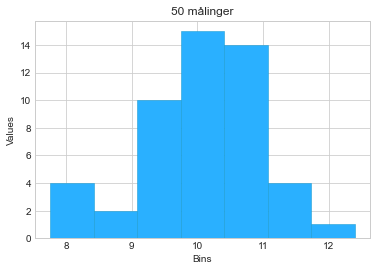

In [7]:
histogram(x)
plt.title("{} målinger".format(N))
plt.show()

Her kan man se en indikasjon på en normalfordeling. Vi øker antall målinger $N$ ytterligere: 

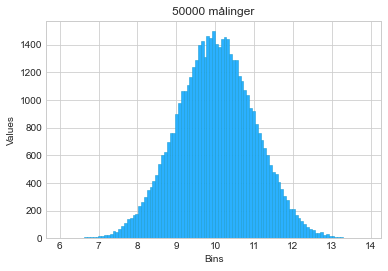

In [8]:
N = 50000
x = performMeasurements(N)
histogram(x)
plt.title("{} målinger".format(N))
plt.show()

Nå ser man svært tydelig at verdiene er normalfordelte. Ved å normalisere histogrammet, kan vi lage en sannsynlighetsfordeling. Det gjør vi, ved å sette normalisering = True. Plottet har samme form, men y-aksen skaleres kraftig ned, og histogrammet integreres til en. Vi legger en teoretisk normalfordeling over, for å se hvor godt vi treffer. 

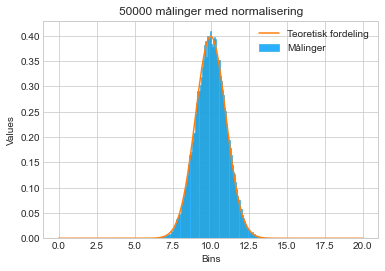

In [9]:
normalisering = True
histogram(x,normalisering)
plt.title("{} målinger med normalisering".format(N))

X = 10
sigma = 1
x = np.linspace(X-10,X+10,1000)
theoretical_norm = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x-X)/sigma)**2)

plt.plot(x,theoretical_norm)
plt.legend(["Teoretisk fordeling","Målinger"])
plt.show()


Dette er en god tilnærming til en teoretisk normalfordeling med $X$ = 10 og $\sigma$ = 1.

## Store talls lov

Vi beveger oss nå mot gjennomsnitt. Gjennomsnitt av målinger er mer stabile enn hver enkel måling, og vi bruker dem for å filtrere ut tilfeldig støy. 

La oss fortsatt simulere målinger som er normalfordelte. Vi tar $N$ målinger, og regner ut gjennomsnittet $\bar x$. Dette gjør vi så $\textit{mange ganger}$ (her: tusen ganger). Altså får vi mange gjennomsnitt. Man kan vise at gjennomsnitt av normalfordelte målinger for stor nok $N$ går mot normalfordeling. Dette kan vi observere en trend mot ved å tegne histogram av gjennomsnittene vi genererte.

Vi ønsker også å undersøke hvordan gjennomsnittet utvikler seg med økende antall målinger $N$. 

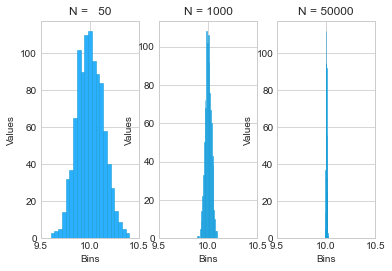

In [10]:
num_measurements = np.array([50,1e3,5e4])
reps = 1000
meanSim = np.zeros([3,reps])
for index,N in enumerate(num_measurements):
    for i in range(reps):
        meanSim[index,i] = np.mean(performMeasurements(N))
    plt.subplot(1,3,index+1)
    plt.title("N = {:4d}".format(int(num_measurements[index])))
    histogram(meanSim[index])
    plt.xlim(X-0.5,X+0.5)
plt.show()

Observer at histogrammene blir spissere og spissere, etterhvert som antall målinger økes.
For $N$ = 50000 har fordelingen nesten ingen variasjon.

## Sentralgrenseteoremet

La oss nå illustrere sentralgrenseteoremet.

Vi ser først videre på nøyaktig normalfordelte data. Siden målingene vi genererte over er nøyaktig normalfordelt, kan man vise matematisk at gjennomsnittene er nøyaktig normalfordelt, uahvengig av antall målinger. Dette kan vi se ved å la x-aksen tilpasse seg data: 

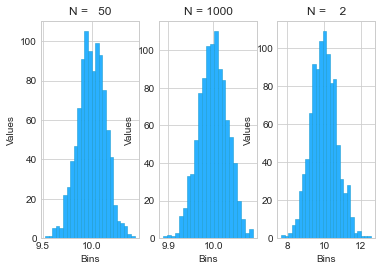

In [11]:
num_measurements = np.array([50,1e3,2])
reps = 1000
meanSim = np.zeros([3,reps])
for index,N in enumerate(num_measurements):
    for i in range(reps):
        meanSim[index,i] = np.mean(performMeasurements(N))
    plt.subplot(1,3,index+1)
    plt.title("N = {:4d}".format(int(num_measurements[index])))
    histogram(meanSim[index])
plt.show()

Gjennomsnittene ser normalfordelte ut, uavhengig av antall målinger.

Vi vil nå undersøke måledata som ikke er normalfordelte. I dette programmet ser vi på en uniform fordeling mellom 0 og 1. Dvs. at alle tall mellom 0 og 1 er like sannsynlige.

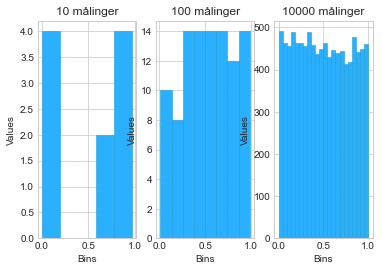

In [12]:
num_measurements = np.array([10,1e2,1e4])
for index,N in enumerate(num_measurements):
    x = np.random.uniform(0,1,int(N))
    plt.subplot(1,3,index+1)
    plt.title("{} målinger".format(int(num_measurements[index])))
    histogram(x)
plt.show()

Vi observerer at for økende antall målinger, kommer vi nærmere og nærmere den uniforme fordelingen. Men hva skjer med fordelingen av gjennomsnittene, dersom vi utfører mange eksperimenter?

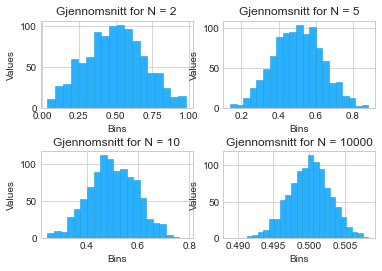

In [13]:
num_measurements = np.array([2,5,10,10000])
reps = 1000
meanSim = np.zeros([4,reps])
for index,N in enumerate(num_measurements):
    meanSim[index] = [np.mean(np.random.uniform(0,1,N)) for j in range(reps)]
    plt.subplot(2,2,index+1)
    plt.subplots_adjust(hspace=0.5)
    plt.title("Gjennomsnitt for N = {}".format(num_measurements[index]))
    histogram(meanSim[index])
plt.show()

Her ser vi at selv om målingene i seg selv ikke er normalfordelt, så blir fordelingen av gjennomsnittene normalfordelt for stor nok $N$. Merk at x-aksen endrer seg per plott, som vil si at gjennomsnittene også har mindre og mindre variasjon, og blir bedre approksimasjoner for $X$.

 ### QQ-plot

Med det blotte øyet kan man tenke seg at plottene ser normalfordelt ut,
men en tydeligere måte å illustrere det på er med et QQ-plot.
Et QQ plot sammenligner teoretiske kvantiler, med empiriske kvantiler. Kvantiler er beskrevet matematisk i kompendiet, men la oss også her se på et enkelt eksempel.<br>

I eksempelet i figuren under har vi en karakterfordeling som er delt inn i kvartiler (a.k.a. firedeler). Den første streken representerer $25\%$ kvartilen, og $25\%$ av dataen ligger bak dette punktet. Den neste linjen er $50\%$ kvartilen, og $50\%$ av dataen ligger bak dette punktet. <br>


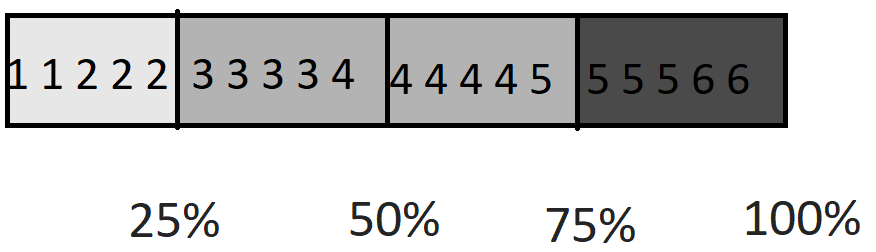



Når du lager et QQ-plot for å undersøke normalitet i datasettet ditt, så finner du først gjennomsnittet og standardavviket. Deretter konstruerer du et datasett fra en normalfordeling med gjennomsnittet og standardavviket du fant.
Så finner du kvantilene til det nye datasettet og det opprinnelige, og plotter dem mot hverandre. 
<br>
Dersom kvantilene i ditt opprinnelige datasett er normalfordelt, kan man vise at forholdet mellom dem og de teoretiske kvantilene være lineært.



La oss undersøke om målingene fra den uniforme fordelingen er normalfordelt. Vi ser på eksempelet $N = 10000$

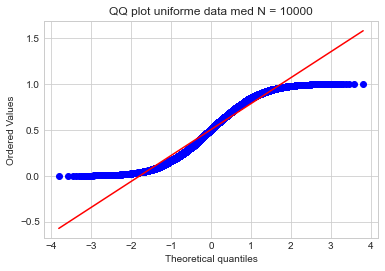

In [14]:
from scipy import stats
N = 10000
stats.probplot(np.random.uniform(0,1,N),plot = plt)
plt.title("QQ plot uniforme data med N = 10000")
plt.show()


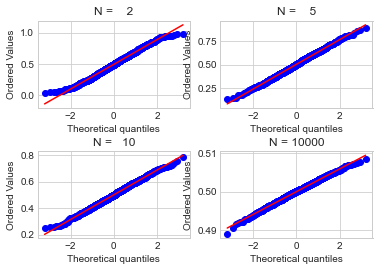

In [15]:
for i in range(len(num_measurements)):
    plt.subplot(2,2,i+1)
    stats.probplot(meanSim[i],plot = plt)
    plt.title("N = {:4d}".format(int(num_measurements[i])))
plt.subplots_adjust(hspace=0.5)
plt.show()

Her ser vi tydelig at ved tilstrekkelig antall målinger, vil gjennomsnittene bli normalfordelt. For få målinger er tilnærmingen ikke så værst, slik vi allerede så i histogrammene, men avvikene er enklere å se på QQ-plottene over enn på histogrammene. Vi ser at avvikene er hovedsaklig i ytterpunktene, som vil si at for lav $N$ vil høye og lave kvantiler til gjennomsnittene av uniforme målinger ikke stemme så godt med de tilsvarende kvantilene til normalfordelingen.




